# Ayudantía 3

En esta Ayudantía revisaremos la importancia de la librería Pandas para efectos de manipulación de la información e introduciremos concepto de analisis exploratorio de datos.


In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import AgglomerativeClustering
import numpy as np

In [2]:
data = pd.read_csv('shopping-data.csv', delimiter=',')

In [3]:
data.head()

,ID,GENERO,INGRESOS,GASTOS
0,1,M,15,39
1,2,M,15,81
2,3,F,16,6
3,4,F,16,77
4,5,F,17,40


Los INGRESOS están en miles de dólares y GASTOS es un número entre 1 y 100 que indica con qué frecuencia una persona gasta dinero en un centro comercial.

**Preguntas**
* ¿Qué tipo de consumidor pertenece a cada cluster?.
* ¿Qué grupo genera mayor interés para un local de comercio?. 
* ¿Tiene algo que ver el género de una persona con el gasto?. Una visualización que podría ayudar es usar la etiqueta GENERO como marca del punto.

In [4]:
df = data.groupby("GENERO")
df.describe()

ID                                                           \
        count        mean        std  min    25%    50%     75%    max   
GENERO                                                                   
F       112.0   97.562500  58.276412  3.0  46.75   94.5  148.25  197.0   
M        88.0  104.238636  57.483830  1.0  59.50  106.5  151.25  200.0   

       INGRESOS             ...               GASTOS                       \
          count       mean  ...    75%    max  count       mean       std   
GENERO                      ...                                             
F         112.0  59.250000  ...  77.25  126.0  112.0  51.526786  24.11495   
M          88.0  62.227273  ...  78.00  137.0   88.0  48.511364  27.89677   

                                     
        min   25%   50%   75%   max  
GENERO                               
F       5.0  35.0  50.0  73.0  99.0  
M       1.0  24.5  50.0  70.0  97.0  

[2 rows x 24 columns]

Antes que todo se resumirá la exploración de datos en el siguiente gráfico que será de utilidad a lo largo de este reporte:

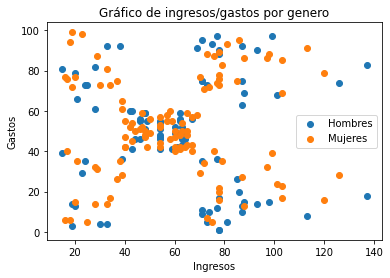

In [5]:
plt.scatter(data["INGRESOS"].loc[data['GENERO']=='M'],data["GASTOS"].loc[data['GENERO']=='M'],label='Hombres')
plt.scatter(data["INGRESOS"].loc[data['GENERO']=='F'],data["GASTOS"].loc[data['GENERO']=='F'],label='Mujeres')
plt.xlabel("Ingresos")
plt.ylabel("Gastos")
plt.legend()
plt.title("Gráfico de ingresos/gastos por genero")
plt.show()

Además contaremos con un resumen de la data en lo que sigue:

In [6]:
data[["INGRESOS", "GASTOS"]].describe()

,INGRESOS,GASTOS
count,200.000000,200.000000
mean,60.560000,50.200000
std,26.264721,25.823522
min,15.000000,1.000000
25%,41.500000,34.750000
50%,61.500000,50.000000
75%,78.000000,73.000000
max,137.000000,99.000000


## ¿Qué tipo de consumidor va a tener cada cluster?
Naturalmente en los cluster van a estar las personas que satisfagan alguna de las siguientes condiciones:


- gastan poco ganan poco
- gastan poco ganan mucho
- gastan mucho ganan poco
- gastan mucho ganan mucho

Por otra parte, también se pueden crear perfiles de clusterizacion por otra interpretacion del comportamiento posible:

- Derrochador
- Neutral
- Avaro

Además existen otras clasificaciones que se pueden realizar. Sin embargo la cantidad de clusters va a depender de lo que se quiere estudiar realmente por lo que a continuación crearemos un dendrograma para ver como se jerarquizan los cluster usando complete link.

In [7]:
clusterizacion = AgglomerativeClustering(5,linkage = 'complete').fit(data[["INGRESOS","GASTOS"]])
clusterizacion.labels_

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 2, 0, 2, 0,
       1, 0, 2, 0, 2, 0, 2, 0, 2, 0, 1, 0, 2, 0, 1, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 1, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0], dtype=int64)

Ahora creare una matriz de respaldo para mostrar los clusters generados

Las etiquetas respectivas son:

0 -> cluster 4 (gastan mucho ganan mucho)

1 -> cluster 5 (neutro)

2 -> cluster 2 (gastan poco ganan mucho)

3 -> cluster 3 (gastan mucho ganan poco)

4 -> cluster 1 (gastan poco ganan poco)


como no son muchas etiquetas se usará ese dato para comparar en la siguiente parte.

In [8]:
data1 = data # Se guarda la tabla en una variable auxiliar
data1.insert(2, "cluster", clusterizacion.labels_) # Se añade el cluster a que pertenece a la tabla

En lo que sigue veamos el gráfico

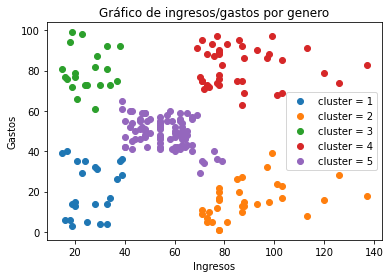

In [9]:
plt.scatter(data1["INGRESOS"].loc[data1['cluster']==4],data1["GASTOS"].loc[data1['cluster']==4],label='cluster = 1')
plt.scatter(data1["INGRESOS"].loc[data1['cluster']==2],data1["GASTOS"].loc[data1['cluster']==2],label='cluster = 2')
plt.scatter(data1["INGRESOS"].loc[data1['cluster']==3],data1["GASTOS"].loc[data1['cluster']==3],label='cluster = 3')
plt.scatter(data1["INGRESOS"].loc[data1['cluster']==0],data1["GASTOS"].loc[data1['cluster']==0],label='cluster = 4')
plt.scatter(data1["INGRESOS"].loc[data1['cluster']==1],data1["GASTOS"].loc[data1['cluster']==1],label='cluster = 5')

plt.xlabel("Ingresos")
plt.ylabel("Gastos")
plt.legend()
plt.title("Gráfico de ingresos/gastos por genero")
plt.show()


- gastan poco ganan poco (cluster 1)
- gastan poco ganan mucho (cluster 2)
- gastan mucho ganan poco (cluster 3)
- gastan mucho ganan mucho (cluster 4)
- neutro  (cluster 5)



De esta parte se conluye que clusters son como se esperaba y en lo que sigue veremos el grupo que genera el mayor interes de comercio

## ¿Qué grupo genera mayor interés para un local de comercio?. 


Si asumimos este conjunto de datos como toda la información que describe este fenomeno la respuesta depende, pues los locales pueden maximizar utilidades incentivando a los que ya compran o tambien pueden mejorar las utilidades aumentando las demandas del grupo que no compra. Los más fáciles de persuadir (aparte de los que poseen gran porcentaje de gasto) son aquellos del cluster central al ser más propensos al cambio entre cluster.

Las personas que gastan poco tienen tendencias similares. Esto asumiendo que todas pueden acceder a creditos por lo que a este grupo le podria venir bien un incentivo de compra.

A continuación veamos donde se concentra la mayor parte de la poblacion 


In [10]:
data1.groupby(["cluster"]).describe()

ID                                                            \
        count        mean        std    min    25%    50%    75%    max   
cluster                                                                   
0        39.0  162.000000  22.803509  124.0  143.0  162.0  181.0  200.0   
1        85.0   87.894118  26.542878   44.0   66.0   87.0  108.0  161.0   
2        32.0  166.250000  21.005376  129.0  150.5  168.0  183.5  199.0   
3        21.0   22.000000  12.409674    2.0   12.0   22.0   32.0   42.0   
4        23.0   23.000000  13.564660    1.0   12.0   23.0   34.0   45.0   

        INGRESOS             ...               GASTOS                        \
           count       mean  ...    75%    max  count       mean        std   
cluster                      ...                                              
0           39.0  86.538462  ...  95.00  137.0   39.0  82.128205   9.364489   
1           85.0  55.811765  ...  63.00   79.0   85.0  49.129412   7.281399   
2           32.0  89.406250  ...  98.25  137.0   32.0  15.593750   8.936548   
3           21.0  25.095238  ...  30.00   38.0   21.0  80.047619  10.249274   
4           23.0  26.304348  ...  33.00   39.0   23.0  20.913043  13.017167   

                                        
          min    25%   50%   75%   max  
cluster                                 
0        63.0  74.50  83.0  90.0  97.0  
1        29.0  43.00  49.0  55.0  65.0  
2         1.0   9.75  15.0  20.5  39.0  
3        61.0  73.00  77.0  87.0  99.0  
4         3.0   9.50  17.0  33.5  40.0  

[5 rows x 24 columns]

La cantidad de datos que lidera es la 1 que consiste en el cluster 5 (el neutral) por lo que algo útil para el comercio sería incentivar las ventas para dicho grupo por el hecho de que son más suceptibles a aumentar el gasto (cuentan con un poco menos de la demanda total). Despues sigue 0, que es el cluster 4 (gastan mucho y ganan mucho). En sintesis las prioridades son:

 
1) Cluster 5 (neutral)

2) Cluster 4 (gastan mucho ganan mucho)

3) Cluster 2 (gastan poco ganan mucho)

4) Cluster 1 (gastan poco ganan poco)

5) Cluster 3 (gastan mucho ganan poco)

Para finalizar en esta parte, puede ser complejo elegir una estrategia sin un objetivo claro por parte de los comerciantes, ya sea captar nuevos clientes (basta con incentivar cluster 1), aumentarla demanda (basta con incentivar a la poblacion del cluster 5), mejorar las utilidades (incentivar clusters 5 y 4), entre otras cosas. Sobre el cluster 3 podriamos afirmar la posibilidad de que sea pura coincidencia de que estuvieron dispuestos a comprar en este ultimo tiempo pero si nos limitamos a la data que hay tambien podria ser buena fuente de ingresos si se quiere maximizar utilidades.




## ¿Tiene algo que ver el género de una persona con el gasto?. Una visualización que podría ayudar es usar la etiqueta GENERO como marca del punto.

Viendo el gráfico parece ser que los datos estan balanceados respecto a los clusters esperados por lo que no debiese importar el genero. La vista es engañosa por lo que comprobaremos esto último númericamente.

Ahora veamos lo que sucede con la información numericamente

In [11]:
data.groupby(["GENERO"]).describe()

ID                                                           \
        count        mean        std  min    25%    50%     75%    max   
GENERO                                                                   
F       112.0   97.562500  58.276412  3.0  46.75   94.5  148.25  197.0   
M        88.0  104.238636  57.483830  1.0  59.50  106.5  151.25  200.0   

       cluster            ... INGRESOS        GASTOS                       \
         count      mean  ...      75%    max  count       mean       std   
GENERO                    ...                                               
F        112.0  1.526786  ...    77.25  126.0  112.0  51.526786  24.11495   
M         88.0  1.511364  ...    78.00  137.0   88.0  48.511364  27.89677   

                                     
        min   25%   50%   75%   max  
GENERO                               
F       5.0  35.0  50.0  73.0  99.0  
M       1.0  24.5  50.0  70.0  97.0  

[2 rows x 32 columns]

A pesar de que los datos estan un poco desvalanceados ( ver count) se puede observar que tanto promedio como quintiles son similares uno del otro. Así se concluye que numericamente el generono influye en el gasto

# Referencias

- [Quick guide to Pandas](https://towardsdatascience.com/a-quick-introduction-to-the-pandas-python-library-f1b678f34673)

- [Group by Documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html)

- [What is Pandas? Why and How to Use Pandas in Python (Video) ](https://www.youtube.com/watch?v=dcqPhpY7tWk)

- [Why is Data Visualization Important?](https://hdsr.mitpress.mit.edu/pub/zok97i7p/release/2)

- [Learn Data science for free](https://youtu.be/eTxyviU0Ddo)